In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
from RetinaFace.retinaface import RetinaFace_mgr


In [2]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc('M','J','P','G'))
res,frame = cap.read()

In [3]:
res

True

In [4]:
print(type(frame))
print(frame.shape)

<class 'numpy.ndarray'>
(720, 1280, 3)


In [133]:
original = cv2.imread('./lena.jpg',cv2.IMREAD_COLOR)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original.shape

(396, 340, 3)

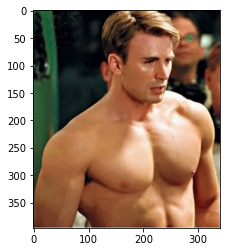

In [134]:
plt.imshow(original)

In [7]:
detector = RetinaFace_mgr()

	[Network] pth/d_net2.tar
	[Network] pth/d_net.pth


In [8]:
boxes = detector(original,'color')

In [9]:
boxes

[[165, 45, 252, 161, 216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]

In [10]:
np.shape(boxes) # 사람 수, ?

(1, 14)

In [11]:
result_boxes = []
lm = []
num_faces = len(boxes)

In [12]:
num_faces

1

In [13]:
frame_h, frame_w, _ = original.shape

In [14]:
print(frame_h)
print(frame_w)
print(_)

396
340
3


In [15]:
for box in boxes :
    left, top, right, bottom = box[:4]

In [16]:
w = right - left
h = bottom - top

In [17]:
print(left,right,top,bottom)

165 252 45 161


In [18]:
print(w,h) # 박스의 가로. 박스의 세로

87 116


In [19]:
lm.append([box[4:]])
result_boxes.append([left,top,right,bottom,int(w*h)]) # 마지막 총 픽셀 수

In [20]:
lm

[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]

In [21]:
result_boxes

[[165, 45, 252, 161, 10092]]

In [22]:
np.shape(lm) # 몇 번째 프레임, 몇 명 있었는지, 박스 영역제외 나머지

(1, 1, 10)

In [23]:
# 갤러리가 있으면 출력할 값
lm[0] # 이번 프레임의 사람수 와, 박스 영역 나머지

[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]

In [24]:
# 갤러리가 없으면
print(num_faces)
print(result_boxes)
print(lm)

1
[[165, 45, 252, 161, 10092]]
[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]


In [25]:
bbox_list = result_boxes
lm_list = lm

In [135]:
# get_boxed_frame
# (image, start 좌표, end 좌표)
cut_frame = cv2.rectangle(original,(left,top),(right,bottom),(255,0,0),thickness=2)
#cv2.rectangle(cut_frame, (bbox[0], bbox[3]+20), (bbox[2], bbox[3]+78), (255,255,255), thickness=-1)
cv2.putText(cut_frame, 'iron man', (bbox[0],bbox[3]+20), cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=2, color=(255,255,255))
cv2.putText(cut_frame, 'iron man', (bbox[0],bbox[3]+60), cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=2, color=(255,255,255))
cv2.putText(cut_frame, 'iron man', (bbox[0],bbox[3]+80), cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=2, color=(255,255,255))

#cut_frame = cv2.putText(cut_frame,str(99.999),(bbox[0],bbox[3]+30),cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=1,color=(255,0,20))

array([[[124, 165, 133],
        [ 90, 129, 100],
        [ 72, 108,  82],
        ...,
        [  2,   2,  10],
        [  1,   1,   9],
        [  1,   1,   9]],

       [[118, 159, 127],
        [ 82, 121,  92],
        [ 63,  99,  73],
        ...,
        [  3,   3,  11],
        [  2,   2,  10],
        [  1,   1,   9]],

       [[117, 156, 125],
        [ 77, 116,  87],
        [ 56,  92,  66],
        ...,
        [  5,   5,  13],
        [  3,   3,  11],
        [  1,   1,   9]],

       ...,

       [[ 56,  28,  16],
        [ 65,  37,  25],
        [ 70,  42,  30],
        ...,
        [165,  95,  59],
        [171, 101,  65],
        [179, 109,  73]],

       [[ 35,  13,   2],
        [ 41,  19,   8],
        [ 45,  21,  11],
        ...,
        [131,  88,  54],
        [135,  92,  58],
        [141,  98,  64]],

       [[218, 200, 190],
        [221, 203, 193],
        [223, 203, 194],
        ...,
        [239, 209, 181],
        [241, 211, 183],
        [245, 215, 187]]

In [125]:
cut_frame.shape

(396, 340, 3)

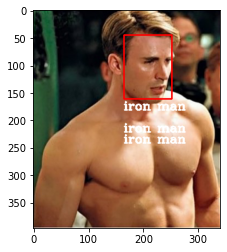

In [136]:
plt.imshow(cut_frame)

In [29]:
result_frame = cut_frame

In [30]:
print(lm)
lm = np.array(lm).astype(np.float32).reshape((5,2))
print(lm)

[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]
[[216.  91.]
 [245.  94.]
 [241. 118.]
 [215. 136.]
 [236. 139.]]


In [36]:
from skimage import transform as trans
src = np.array([
            [30.2946, 51.6963],
            [65.5318, 51.5014],
            [48.0252, 71.7366],
            [33.5493, 92.3655],
            [62.7299, 92.2041] ], dtype=np.float32 )        
tform = trans.SimilarityTransform()

In [37]:
# src : (n,2) array, dct : (n,2) array
estimate(lm,src)

NameError: name 'estimate' is not defined

In [38]:
M = tform.params[0:2, :]

In [53]:
# (src image, M = 변환 행렬, output image size)
prob_face_emb= cv2.warpAffine(original, M, (112,112), borderValue=0.0)

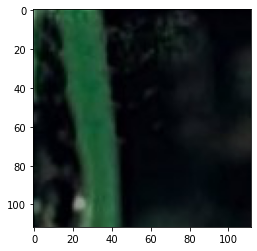

In [45]:
plt.imshow(warped)

In [43]:
# bbox = 박스 영역 포인트 4개와 총픽셀값, lm_list 는 5개의 landmark
for bbox, lm in zip(bbox_list, lm_list) :
    print(bbox,lm)
    # get_face function에 input으로 오리지널 이미지와 lm3
    prob_face = get_face

[165, 45, 252, 161, 10092] [[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]


NameError: name 'get_face' is not defined

In [81]:
device = 'cuda'
def calculate_score(prob, reg):
        
    x = torch.squeeze(prob).to(device)
    xx = torch.dot(x, x)

    y = reg.to(device)
    yy = torch.pow(y, 2).to(device)
    yy = torch.sum(yy, dim=1)
        
    xy = torch.matmul(y, x)
    norm = torch.sqrt(xx*yy) + 0.000001

    cosine_dist = 1.0 - xy / norm # batch
    cosine_dist = torch.max(torch.min(cosine_dist, torch.ones([1], device=device)), torch.zeros([1], device=device)).cpu() # batch

    cosine_dist = torch.where(cosine_dist >= 1.0, torch.tensor(1.), cosine_dist) 
    score = (1.0 - cosine_dist) * 100

    return score

In [75]:
def match_face(prob_face_emb):
        
        score = self.calculate_score(prob_face_emb, self.gal_embs)
        score.sort(reverse=True)
        #top1_idx = int(torch.argmax(score))
        top1_idx = score[0]
        top2_idx = scroe[1]
        top3_idx = score[2]
        top1_score = float(score[top1_idx])

        if top1_score > self.reid_thres :
            top1_name = self.gal_list.loc[top1_idx]['file'][:-4]
        else:
            top1_name = 'Unknown'
            top1_score = -1

        return top1_score, top1_name

In [76]:
import numpy as np
import torch

gal_embs = torch.from_numpy(np.load('./Glint360k_r18.npy'))

In [52]:
gal_embs

tensor([[  7068578.5000,  -3657816.2500,  18521962.0000,  ...,
         -21865470.0000,   -565902.1250,    643629.2500],
        [ -2285020.5000,  -9428615.0000,  22952996.0000,  ...,
         -31418348.0000,  -5569027.0000,   7592516.0000],
        [  4504281.0000,  -4588247.0000,  24096306.0000,  ...,
         -21781832.0000,   1875158.8750,   5794605.0000],
        ...,
        [  7148655.5000,  -2669714.2500,  14973838.0000,  ...,
         -13232477.0000,   6163776.0000,   9931271.0000],
        [        0.0000,         0.0000,         0.0000,  ...,
                 0.0000,         0.0000,         0.0000],
        [  8853565.0000,  -7389470.5000,  12796529.0000,  ...,
         -20280064.0000,  -3766816.2500,   9090001.0000]])

In [95]:
score = calculate_score(prob = gal_embs[0],reg = gal_embs)

In [92]:
print(type(score))
score = list(score)
print(type(score))

<class 'torch.Tensor'>
<class 'list'>


In [86]:
score.sort(reverse=True)

In [94]:
type(score[0])

torch.Tensor

In [96]:
score

tensor([100.0000,  84.7904,  83.6621,  89.4994,  82.3511,  79.4235,  85.9965,
         86.8414,  84.5051,  80.6597,  81.5618,  78.6714,  70.5389,   0.0000,
         73.9843,  87.4366,  82.0598,  74.1062,  77.4275,  89.0164,   0.0000,
         80.0112,  81.3866,  77.1126,  84.5061,  83.1583,  76.1969,  86.9822,
         84.9098,   0.0000,  76.6902,  75.2349,  88.7805,  82.3131,  89.2141,
          0.0000,  82.3813,  78.4638,  68.8000,   0.0000,  88.7359,  86.1790,
         84.6812,  87.0915,  82.4516,  87.8939,  74.7374,  80.0838,   0.0000,
         86.0134])

In [97]:
list(score)

[tensor(100.0000),
 tensor(84.7904),
 tensor(83.6621),
 tensor(89.4994),
 tensor(82.3511),
 tensor(79.4235),
 tensor(85.9965),
 tensor(86.8414),
 tensor(84.5051),
 tensor(80.6597),
 tensor(81.5618),
 tensor(78.6714),
 tensor(70.5389),
 tensor(0.),
 tensor(73.9843),
 tensor(87.4366),
 tensor(82.0598),
 tensor(74.1062),
 tensor(77.4275),
 tensor(89.0164),
 tensor(0.),
 tensor(80.0112),
 tensor(81.3866),
 tensor(77.1126),
 tensor(84.5061),
 tensor(83.1583),
 tensor(76.1969),
 tensor(86.9822),
 tensor(84.9098),
 tensor(0.),
 tensor(76.6902),
 tensor(75.2349),
 tensor(88.7805),
 tensor(82.3131),
 tensor(89.2141),
 tensor(0.),
 tensor(82.3813),
 tensor(78.4638),
 tensor(68.8000),
 tensor(0.),
 tensor(88.7359),
 tensor(86.1790),
 tensor(84.6812),
 tensor(87.0915),
 tensor(82.4516),
 tensor(87.8939),
 tensor(74.7374),
 tensor(80.0838),
 tensor(0.),
 tensor(86.0134)]

In [99]:
answer = []
for i in range(len(score)) :
    answer.append([score[i],i])

In [100]:
answer

[[tensor(100.0000), 0],
 [tensor(84.7904), 1],
 [tensor(83.6621), 2],
 [tensor(89.4994), 3],
 [tensor(82.3511), 4],
 [tensor(79.4235), 5],
 [tensor(85.9965), 6],
 [tensor(86.8414), 7],
 [tensor(84.5051), 8],
 [tensor(80.6597), 9],
 [tensor(81.5618), 10],
 [tensor(78.6714), 11],
 [tensor(70.5389), 12],
 [tensor(0.), 13],
 [tensor(73.9843), 14],
 [tensor(87.4366), 15],
 [tensor(82.0598), 16],
 [tensor(74.1062), 17],
 [tensor(77.4275), 18],
 [tensor(89.0164), 19],
 [tensor(0.), 20],
 [tensor(80.0112), 21],
 [tensor(81.3866), 22],
 [tensor(77.1126), 23],
 [tensor(84.5061), 24],
 [tensor(83.1583), 25],
 [tensor(76.1969), 26],
 [tensor(86.9822), 27],
 [tensor(84.9098), 28],
 [tensor(0.), 29],
 [tensor(76.6902), 30],
 [tensor(75.2349), 31],
 [tensor(88.7805), 32],
 [tensor(82.3131), 33],
 [tensor(89.2141), 34],
 [tensor(0.), 35],
 [tensor(82.3813), 36],
 [tensor(78.4638), 37],
 [tensor(68.8000), 38],
 [tensor(0.), 39],
 [tensor(88.7359), 40],
 [tensor(86.1790), 41],
 [tensor(84.6812), 42],
 [

In [101]:
answer.sort(reverse=True)

In [104]:
type(answer[0][1])

int